In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd

[[0.         0.78571429 0.21428571]
 [0.66666667 0.         0.33333333]
 [0.6        0.4        0.        ]]


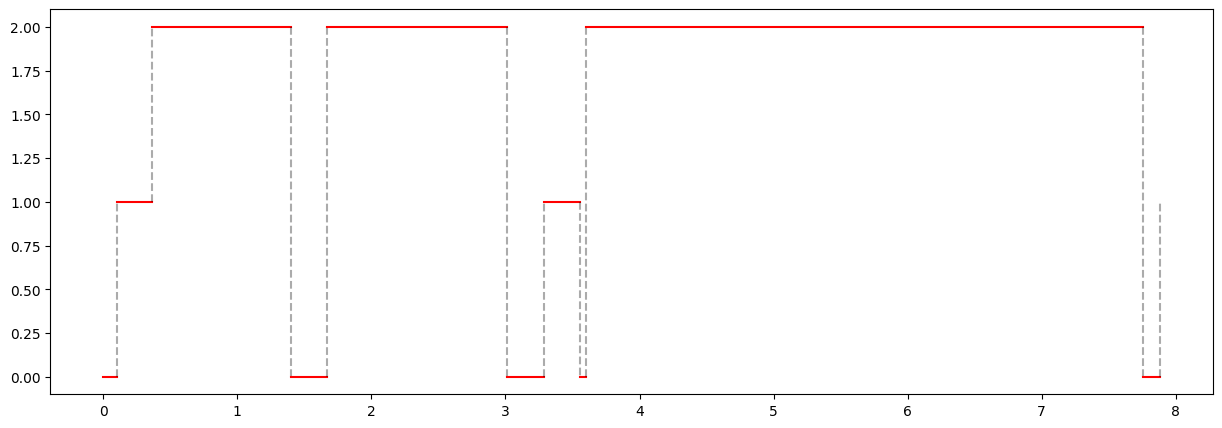

In [52]:
#1
#параметры
Q = np.array([[-14,11,3],[2,-3,1],[3/5,2/5,-1]])
n = 3
N = 10
fig, ax = plt.subplots(1,1,figsize=(15,5))


#вложенная цепь
P = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            P[i][j] = Q[i][j]/(-Q[i][i])

print(P)


#моделируем процесс
X = 0
t_0 = 0
t_1 = 0
for j in range(N):
    X_next = scipy.stats.multinomial.rvs(n=1,p=P[X])
    X_next = np.where(X_next == 1)[0][0]
    t_1 = scipy.stats.expon.rvs(scale=1/Q[X][X_next])
    ax.plot([t_0,t_0+t_1],[X,X],color='red')
    ax.vlines(t_0+t_1,ymin=X,ymax=X_next,colors='black',linestyles='--',alpha=0.33)
    t_0 += t_1
    X = X_next
plt.show()

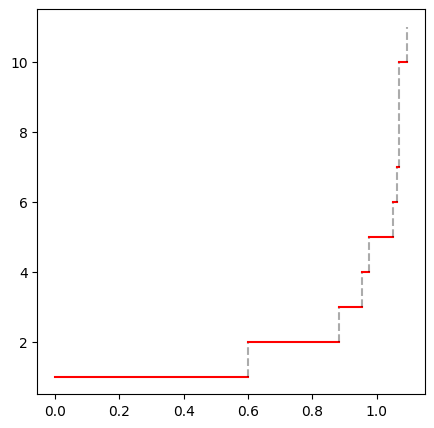

In [53]:
#2
#параметры
X = 1
N = 10
fig, ax = plt.subplots(1,1,figsize=(5,5))
t_0 = 0

#процесс
for j in range(N):
    intens = X**2
    t_1 = scipy.stats.expon.rvs(scale = 1 / intens)
    ax.plot([t_0,t_0+t_1],[X,X],color='red')
    ax.vlines(t_0+t_1,ymin=X,ymax=X+1,colors='black',linestyles='--',alpha=0.33)
    X += 1
    t_0 += t_1

plt.show()

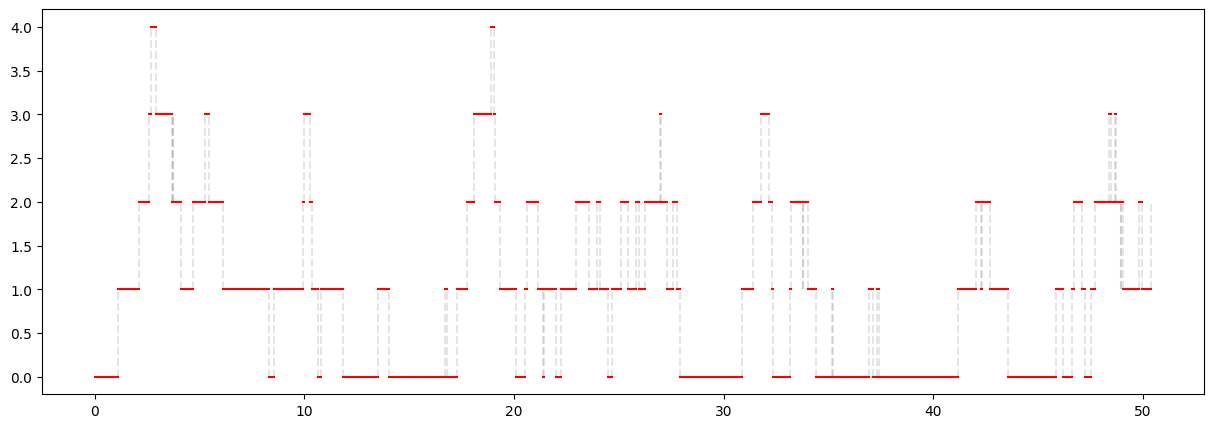

In [29]:
#3 (a)
#параметры
l = 1
mu = 1
N = 100
n = 3
fig, ax = plt.subplots(1,1,figsize=(15,5))

#процесс
t_0 = 0
X = 0
queue = 0
in_work = 0
for i in range(N):
    t = scipy.stats.expon.rvs(scale=1/l) #время прихода клиента
    
    if in_work > 0: #если кто-то в процессе обработки
        t_out = scipy.stats.expon.rvs(scale = 1/(in_work * mu)) #время когда парикмахеры завершили одну обработку
        if t_out < t: #если обработали раньше, чем пришел новый
            if queue > 0: #если в очереди кто то есть, то
                queue -= 1 #берем клиента из очереди;
            else: #если очередь пуста, то
                in_work -= 1 #один работник освобождается;
        else: # если новый пришел раньше, чем обработали кого-то, то
            if in_work < n: #если есть свободный парикмахер, то
                in_work += 1 #он берет пришедшего клиента;
            else: # если все заняты, то
                queue += 1 #клиент идет в очередь;
        t = min(t,t_out)
    else: #если все парикмахеры свободны
        in_work += 1 #то он один берет нового клиента
        
    X_next = queue + in_work #суммарное число клиентов
    ax.plot([t_0,t_0+t],[X,X],color='red')
    ax.vlines(t_0+t,ymin=min(X,X_next),ymax=max(X,X_next),colors='black',linestyles='--',alpha=0.1)
    t_0 += t
    X = X_next

plt.show()

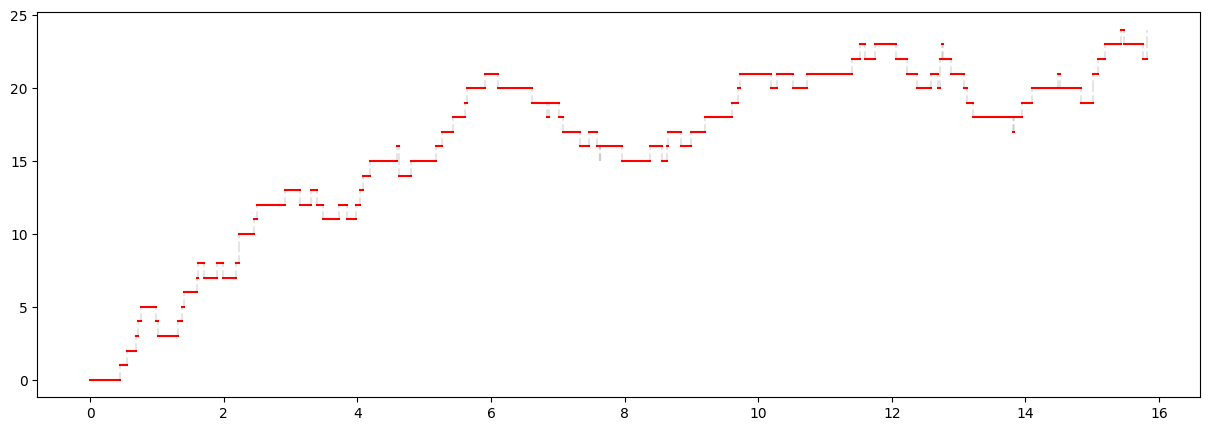

In [30]:
#3 (b)
#параметры
l = 4
mu = 1
N = 100
n = 3
fig, ax = plt.subplots(1,1,figsize=(15,5))

#процесс
t_0 = 0
X = 0
queue = 0
in_work = 0
for i in range(N):
    t = scipy.stats.expon.rvs(scale=1/l) #время прихода клиента
    
    if in_work > 0: #если кто-то в процессе обработки
        t_out = scipy.stats.expon.rvs(scale = 1/(in_work * mu)) #время когда парикмахеры завершили одну обработку
        if t_out < t: #если обработали раньше, чем пришел новый
            if queue > 0: #если в очереди кто то есть, то
                queue -= 1 #берем клиента из очереди;
            else: #если очередь пуста, то
                in_work -= 1 #один работник освобождается;
        else: # если новый пришел раньше, чем обработали кого-то, то
            if in_work < n: #если есть свободный парикмахер, то
                in_work += 1 #он берет пришедшего клиента;
            else: # если все заняты, то
                queue += 1 #клиент идет в очередь;
        t = min(t,t_out)
    else: #если все парикмахеры свободны
        in_work += 1 #то он один берет нового клиента
        
    X_next = queue + in_work #суммарное число клиентов
    ax.plot([t_0,t_0+t],[X,X],color='red')
    ax.vlines(t_0+t,ymin=min(X,X_next),ymax=max(X,X_next),colors='black',linestyles='--',alpha=0.1)
    t_0 += t
    X = X_next

plt.show()

In [54]:
#4
#параметры
Q = np.array([[-5,1,3,1],[1,-3,1,1],[3,1,-5,1],[1,1,1,-3]])
n = 4
N = 1000


#процесс
t_0
X = 0
times = np.zeros(n)
for i in range(N):
    p = np.zeros(n)
    for j in range(n):
        if Q[X][j] >= 0:
            p[j] = Q[X][j]
    p = p / np.sum(p)
    X_next = scipy.stats.multinomial.rvs(n=1,p=p)
    X_next = np.where(X_next == 1)[0][0]
    times[X] += 1
    X = X_next


print('для вложенной цепи:')
print(times/np.sum(times),'\n')
print('для Q:') #легко подбирается
print([1/n for i in range(n)],'\n')

для вложенной цепи:
[0.323 0.168 0.319 0.19 ] 

для Q:
[0.25, 0.25, 0.25, 0.25] 

